# Scenario-Based Advanced Internship Assignment

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

sns.set(style='whitegrid')
%matplotlib inline

In [10]:
# Load the data

big_mart = pd.read_csv(r"C:\Users\Admin\Rasa_Intern\Files\big_mart_sales.csv")
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
# Scenario 1: Product Performance Analysis

bm_item_type_rev=big_mart.groupby('Item_Type')['Item_Outlet_Sales'].agg(['sum']).sort_values(by='sum')
total_rev = bm_item_type_rev['sum'].sum()
bm_item_type_rev['cumm_sum']=(bm_item_type_rev['sum']).cumsum()
bm_item_type_rev['percent']=(bm_item_type_rev['sum']/total_rev)*100
bm_item_type_rev['cumm_percent'] = bm_item_type_rev['percent'].cumsum()
bm_item_type_rev.sort_values(by='sum',ascending=False,inplace=True)

top_items = bm_item_type_rev[bm_item_type_rev['cumm_percent']<=80]
top_items

print("The Top 5 item types using Pareto principle is:\n\n",top_items[:5])

The Top 5 item types using Pareto principle is:

                        sum      cumm_sum    percent  cumm_percent
Item_Type                                                        
Household     2.055494e+06  1.303828e+07  11.056317     70.131739
Frozen Foods  1.825735e+06  1.098279e+07   9.820464     59.075422
Dairy         1.522594e+06  9.157051e+06   8.189897     49.254958
Canned        1.444151e+06  7.634457e+06   7.767962     41.065061
Baking Goods  1.265525e+06  6.190305e+06   6.807148     33.297099


In [19]:
# Grouping By Item_Type to find which Category underperforms

Item_Stats = big_mart.groupby('Item_Type').agg({'Item_Outlet_Sales':'mean','Item_MRP':'mean'}).sort_values(by='Item_MRP',ascending=False)
Item_Stats['Mean_Sale_Percent']=Item_Stats['Item_Outlet_Sales']/Item_Stats['Item_MRP']
Item_Stats

# Thresholds
High_mrp_threshold = Item_Stats['Item_MRP'].quantile(0.75)
Low_sales_threshold = Item_Stats['Item_Outlet_Sales'].quantile(0.25)

# Item Types with high MRP but low sales
Underperformers = Item_Stats.loc[(Item_Stats['Item_MRP']>=High_mrp_threshold) & (Item_Stats['Item_Outlet_Sales']<=Low_sales_threshold)]

print("\nUnderperforming Item Types:\n",Underperformers)


Underperforming Item Types:
 Empty DataFrame
Columns: [Item_Outlet_Sales, Item_MRP, Mean_Sale_Percent]
Index: []


In [21]:
# Since this does not help us find the underperformer we'll switch to Item_Identifier
Item_Stats = big_mart.groupby('Item_Identifier').agg({'Item_Outlet_Sales':'mean','Item_MRP':'mean'}).sort_values(by='Item_MRP',ascending=False)
Item_Stats

# Thresholds
High_mrp_threshold = Item_Stats['Item_MRP'].quantile(0.75)
Low_sales_threshold = Item_Stats['Item_Outlet_Sales'].quantile(0.25)

# Items with high MRP but low sales
Underperformers = Item_Stats.loc[(Item_Stats['Item_MRP']>=High_mrp_threshold) & (Item_Stats['Item_Outlet_Sales']<=Low_sales_threshold)]

print("\nUnderperforming Items:\n",Underperformers)


Underperforming Items:
                  Item_Outlet_Sales    Item_MRP
Item_Identifier                               
FDM12                  1193.335533  189.154733


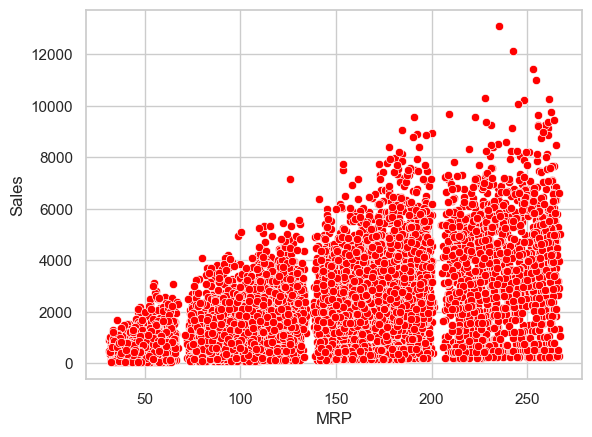

In [239]:
# Scatter plot

sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=bm4,color='red')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.show()

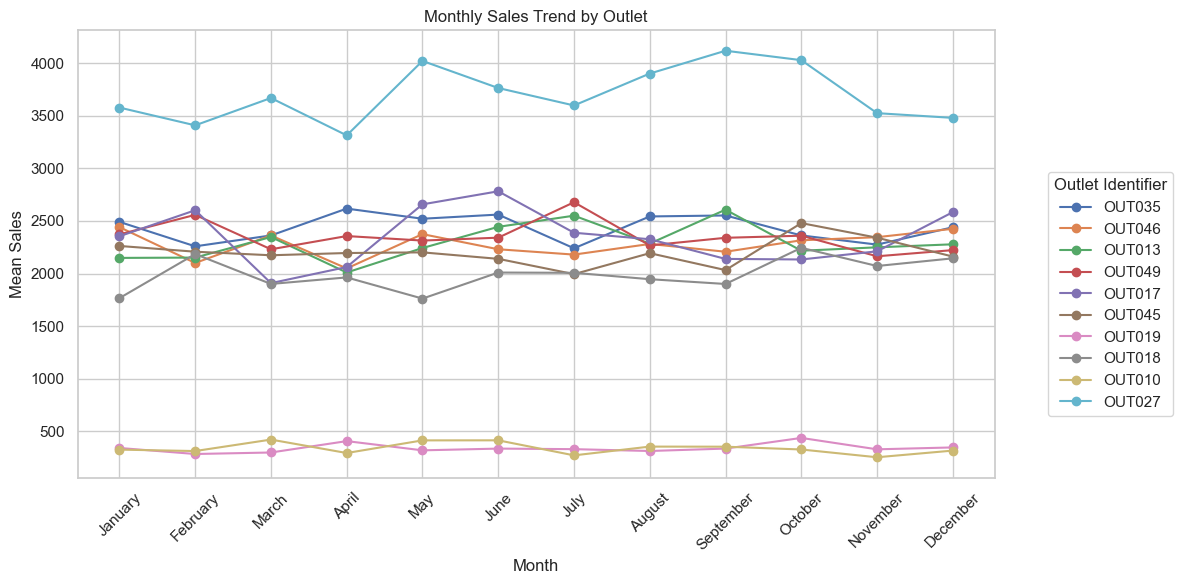

In [83]:
# Scenario 2: Seasonal Outlet Insights

bm2=big_mart

np.random.seed(42)
bm2['Month_Num']=np.random.randint(1,13,size=len(bm2['Item_Identifier']))
bm2['Month']=bm2['Month_Num'].apply(lambda x: calendar.month_name[x])

MS_trend=bm2.groupby(['Outlet_Identifier','Month','Month_Num'])['Item_Outlet_Sales'].agg(['mean']).sort_values(by='Month_Num').reset_index()

plt.figure(figsize=(12, 6))

for outlet in MS_trend['Outlet_Identifier'].unique():
    subset = MS_trend[MS_trend['Outlet_Identifier'] == outlet]
    plt.plot(subset['Month'], subset['mean'], marker='o', label=outlet)

plt.title('Monthly Sales Trend by Outlet')
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.legend(title='Outlet Identifier',loc='upper left', bbox_to_anchor=(1.05, 0.7))
plt.tight_layout()
plt.show()

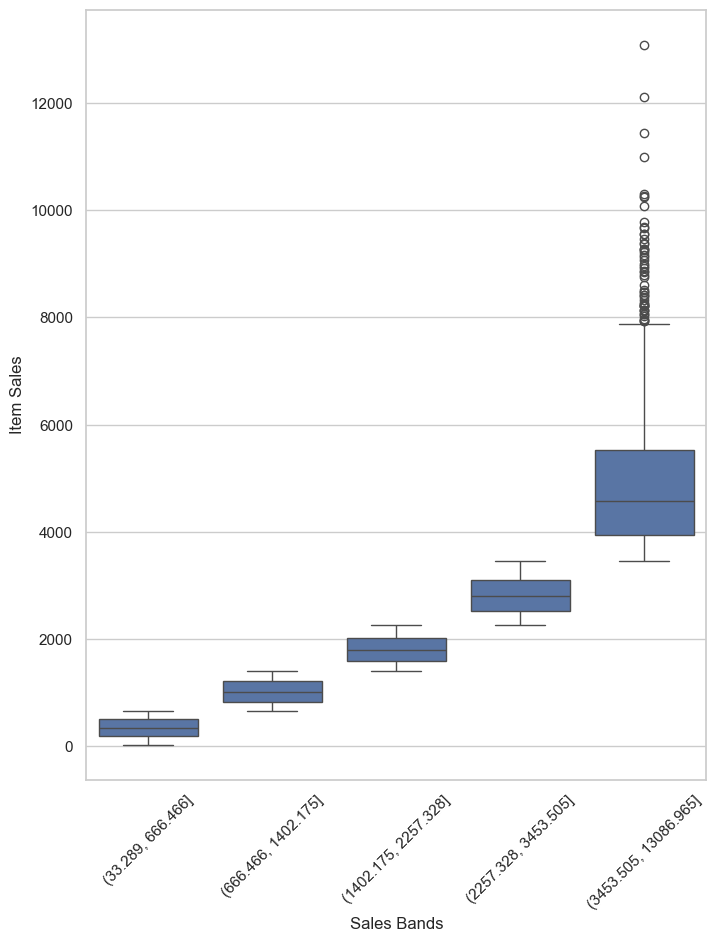

In [157]:
# Scenario 3: Price Band Segmentation

bm3=big_mart
bm3['Sales_Band']=pd.qcut(x=bm3['Item_Outlet_Sales'],q=5)
sale_bw = bm3.groupby('Sales_Band',observed=False)['Item_Outlet_Sales'].agg(['mean'])

plt.figure(figsize=(8,10))
sns.boxplot(x='Sales_Band',y='Item_Outlet_Sales',data=bm3)
plt.xlabel('Sales Bands')
plt.ylabel('Item Sales')
plt.xticks(rotation=45)
plt.show()

In [213]:
# Scenario 4: Stock Optimization Strategy

bm4 = big_mart
bm4['Units_Sold']=round((bm4['Item_Outlet_Sales']/bm4['Item_MRP']),0)
bm4['Stock_Volume']=bm4['Units_Sold']*bm4['Item_Weight']

volume_threshold = bm4['Stock_Volume'].quantile(0.75)
sales_threshold = bm4['Item_Outlet_Sales'].quantile(0.20)

Overstocked_Items = bm4[(bm4['Item_Outlet_Sales']< sales_threshold)&
                        (bm4['Stock_Volume']> volume_threshold)] 

print("Overstocked Items:\n")
Overstocked_Items

Overstocked Items:



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Month_Num,Month,Sales_Band,Stock_Volume,Units_Sold
902,NCI31,20.00,Low Fat,0.081658,Others,35.0190,OUT018,2009,Medium,Tier 3,Supermarket Type2,585.9040,10,October,"(33.289, 666.466]",340.00,17.0
1015,FDR43,18.20,Low Fat,0.161355,Fruits and Vegetables,38.3190,OUT013,1987,High,Tier 3,Supermarket Type1,585.9040,12,December,"(33.289, 666.466]",273.00,15.0
1518,NCY41,16.75,low fat,0.076164,Health and Hygiene,34.0532,OUT017,2007,NaN,Tier 2,Supermarket Type1,575.2512,10,October,"(33.289, 666.466]",284.75,17.0
1616,FDR43,18.20,Low Fat,0.162147,Fruits and Vegetables,37.7190,OUT018,2009,Medium,Tier 3,Supermarket Type2,549.2850,3,March,"(33.289, 666.466]",273.00,15.0
1808,FDQ22,16.75,Low Fat,0.029786,Snack Foods,38.9822,OUT049,1999,Medium,Tier 1,Supermarket Type1,628.5152,4,April,"(33.289, 666.466]",268.00,16.0
2140,DRE03,19.60,Low Fat,0.024364,Dairy,46.3718,OUT017,2007,NaN,Tier 2,Supermarket Type1,661.8052,5,May,"(33.289, 666.466]",274.40,14.0
2144,NCM30,19.10,LF,0.067239,Household,39.6796,OUT013,1987,High,Tier 3,Supermarket Type1,660.4736,12,December,"(33.289, 666.466]",324.70,17.0
2163,FDG22,17.60,Regular,0.041381,Snack Foods,35.0190,OUT046,1997,Small,Tier 1,Supermarket Type1,659.1420,4,April,"(33.289, 666.466]",334.40,19.0
2503,NCL05,19.60,Low Fat,0.047889,Health and Hygiene,42.2770,OUT035,2004,Small,Tier 2,Supermarket Type1,605.8780,9,September,"(33.289, 666.466]",274.40,14.0
2561,NCL05,19.60,Low Fat,0.000000,Health and Hygiene,42.8770,OUT049,1999,Medium,Tier 1,Supermarket Type1,649.1550,8,August,"(33.289, 666.466]",294.00,15.0


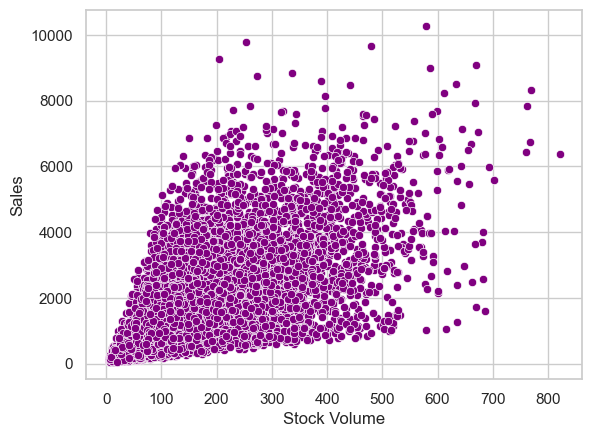

In [219]:
# Scatter Plot

sns.scatterplot(x='Stock_Volume',y='Item_Outlet_Sales',data=bm4,color='purple')
plt.xlabel('Stock Volume')
plt.ylabel('Sales')
plt.show()

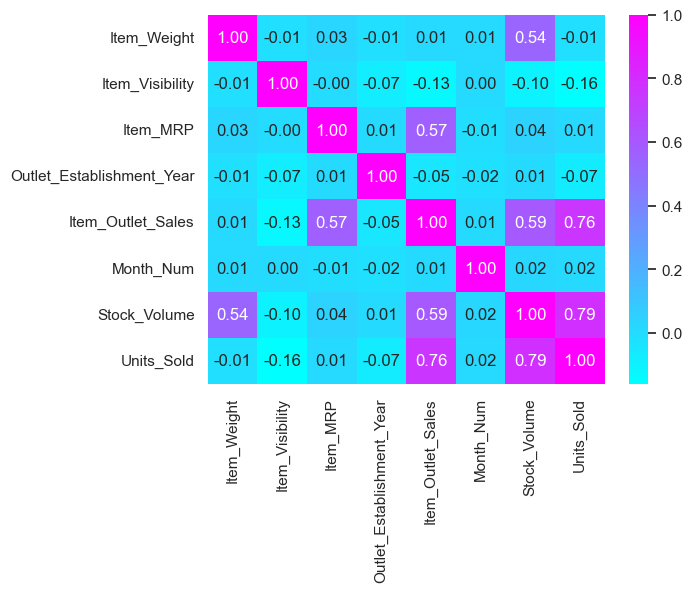

In [255]:
# Scenario 5: Correlation with Revenue

bm5 = big_mart
corr=bm5.corr(numeric_only=True)

sns.heatmap(corr,annot=True,cmap='cool', fmt=".2f")
plt.show()

In [265]:
# Unstack the matrix 
corr_unstacked = corr.unstack()

# Remove self-correlations
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Drop duplicates
corr_unstacked = corr_unstacked.groupby([frozenset(i) for i in corr_unstacked.index]).mean()

# Top 3
top_3 = corr_unstacked.sort_values(ascending=False).head(3)

print("\nTop 3 positive correlations:")
print(top_3)


Top 3 positive correlations:
(Stock_Volume, Units_Sold)           0.785227
(Item_Outlet_Sales, Units_Sold)      0.759340
(Item_Outlet_Sales, Stock_Volume)    0.593796
dtype: float64
